In [2]:
# Eri Osta
# ads829

## Lab 4B

Lab 4 consists of two exercises on reading in data from external CSV and JSON files into Pandas DataFrames.

### Tasks

In this exercise, you will analyze in 2019 data on FIFA soccer players' data. You will read in these data in the ```fifa2019.csv``` CSV file data into a Pandas dataframe. The tasks are:

1. Clean the data
2. First analysis - Overall rating versus wage
3. Second analysis - Overall rating per club
4. Third analysis - Distribution of wages in highest waged clubs

More information is provided below on each of these tasks. 

#### Clean the Data

Read the ```fifa2019.csv``` capturing only the ```ID```, ```Club```, ```Overall```, ```Wage```, ```Position``` columns into a Pandas dataframe. 

Clean the data in the following manner:

1. ```Wage``` is a monetary amount shown in Euros (€). Wages also include ```K``` to represent thousands of Euros. Remove the ```'K'``` from the string.

2. Remove any player who does not belong to a club and any player who makes 0 Euros in ```Wage```. Players that aren't assigned to a club are the same players who make 0 Euros. 

3. Ultimately, the ```Overall``` and ```Wage``` should be integers. 

#### First Analysis

Investigate the relationship between a player's ```Overall``` rating compared to their ```Wage```. Plot this data as a scatterplot with the x axis representing the ```Overall``` rating and the y axis representing the ```Wage``` (in 100Ks).

#### Second Analysis

Investigate the data based on the club in terms of average ```Overall``` rating of all players in that club. Plot these data as a bar graph for the top 10 clubs in terms of average ```Overall``` rating. The x axis will be the ```Club```. The y axis will be the average ```Overall``` in <strong>descending</strong> order, which will help you determine the highest valued teams in terms of their players. 

This task will require you to group the ```DataFrame``` by ```Club```. You may also need to create a new ```DataFrame``` for to create this plot. 

#### Third Analysis

Investigate the distribution of salaries for the top 10 clubs in terms of average ```Wage```. 
You may need to create a new ```DataFrame``` to create this plot. Plot these data on scatterplot or stripplot on top of a boxplot to show the distribution of data. The y axis will be the ```Club``` while the x axis will be the ```Wage```. 

This task will require you to group the ```DataFrame``` by ```Club```. You may also need to create a new ```DataFrame``` for to create this plot. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def clean_data(filename):
    """
    Clean and pre-process the FIFA soccer players data.
    
    Parameters:
        filename (str): The path and name of the csv file to be cleaned.
        
    Returns:
        DataFrame: The cleaned and pre-processed dataframe.
    """
    # Read the csv file and capture only the specified columns
    df = pd.read_csv(filename, usecols=["sofifa_id", "club_name", "overall", "wage_eur", "player_positions"])
    
    # Remove K from Wage column
    df["wage_eur"] = df["wage_eur"] * 1000
    
    # Remove players who do not belong to a club or who make 0 Euros in Wage
    df = df[df["club_name"].notnull() & (df["wage_eur"] != 0.0)].reset_index(drop=True)
    
    # Convert Overall and Wage to integers
    df["overall"] = df["overall"].astype(int)
    df["wage_eur"] = df["wage_eur"].astype(int)
    
    return df

df = clean_data('players_22.csv')

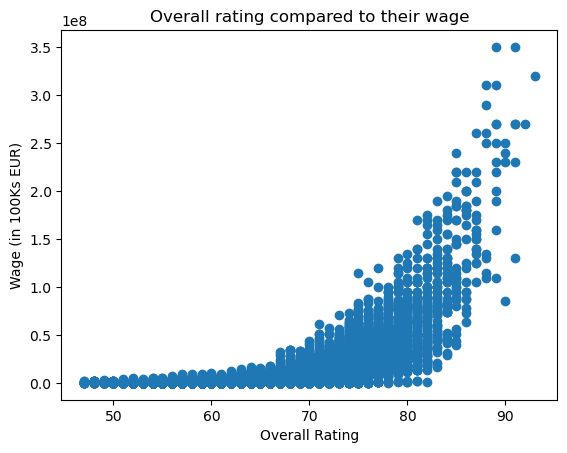

In [5]:
# First analysis plot goes here:  Overall rating compared to their wage
plt.scatter(df["overall"], df["wage_eur"])
plt.xlabel("Overall Rating")
plt.ylabel("Wage (in 100Ks EUR)")
plt.title("Overall rating compared to their wage")
plt.show()

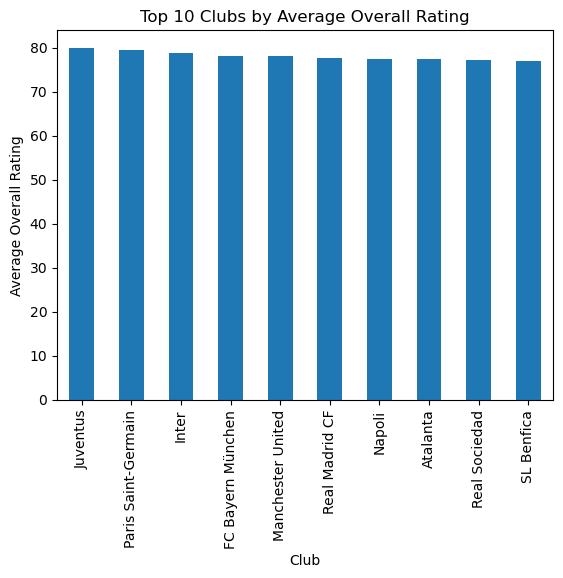

In [6]:
# Second analysis plot goes here:  Wage and Value of all players by club
club_overall = df.groupby("club_name").mean().sort_values("overall", ascending=False)["overall"]

club_overall[:10].plot(kind="bar")
plt.xlabel("Club")
plt.ylabel("Average Overall Rating")
plt.title("Top 10 Clubs by Average Overall Rating")
plt.show()

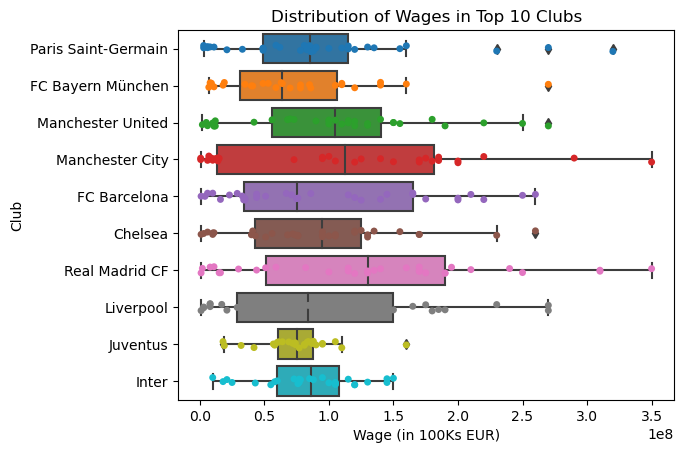

In [7]:
# Third analysis plot goes here:  Distribution of wages by club
club_wage = df.groupby("club_name").mean().sort_values("wage_eur", ascending=False)["wage_eur"]

# Select the top 10 clubs in terms of average Wage
top_clubs = club_wage[:10].index

# Create a new DataFrame with only the top 10 clubs
top_clubs_df = df[df["club_name"].isin(top_clubs)]

# Plot the distribution of wages for the top 10 clubs using a boxplot and stripplot
sns.boxplot(x="wage_eur", y="club_name", data=top_clubs_df)
sns.stripplot(x="wage_eur", y="club_name", data=top_clubs_df, jitter=True)
plt.xlabel("Wage (in 100Ks EUR)")
plt.ylabel("Club")
plt.title("Distribution of Wages in Top 10 Clubs")
plt.show()

## Questions

1. What is the relationship between a player's Overall rating compared to their Wage? Is there any significant relationship between a player's rating and their wage?

2. Which clubs has the highest player Overall ratings on average? Find some information on one of the top three clubs in the barplot and report any information about the success of those clubs around 2019. 

3. Which clubs have the smallest and largest distribution in terms of wages? Are there any extreme outliers in this data? What information can you find about those outliers in terms of how extreme their wages are compared to the rest of the club?

## Answers

1. Yes, there seems to be a significant, exponential relationship.

2. Juventus, Paris Saint-Germain, Inter, FC Bayern Munchen, Manchester United, Real Madrid CF, Napoli, Atalanta, Real Sociedad, SL Benfica.

* Juventus is one of the most successful football clubs in Italy, having won numerous Serie A titles and two UEFA Champions League titles. In recent years, Juventus has experienced success under the management of Massimiliano Allegri and later, Andrea Pirlo. In the 2019-2020 season, they won their ninth consecutive Serie A title.
* Paris Saint-Germain, or PSG, is a French professional football club that has become one of the dominant forces in French football in recent years. PSG has won seven Ligue 1 titles in the last eight seasons, including the 2019-2020 season. The club has also made several deep runs in the UEFA Champions League in recent years.
* Inter Milan, also known as Inter, is an Italian football club that has a long and successful history in Italian and European football. In the recent years, Inter has seen a resurgence under the management of Antonio Conte, winning the Serie A title in the 2020-2021 season.

3. Juventus has the smallest distribution; Manchester United, Real Madrid CF seem to have similar large distributions. Yes, the latter do have outliers, likely because both of these clubs have some of the highest paid players.
* Manchester United: Alexis Sanchez, Paul Pogba, Romelu Lukaku, David de Gea, Nemanja Matic
* Real Madrid: Gareth Bale, Cristiano Ronaldo, Sergio Ramos, Luka Modric, Toni Kroos

## Sources
* Juventus official website: https://www.juventus.com/
* UEFA website: https://www.uefa.com/teamsandplayers/teams/club=52747/profile/index.html
* BBC Sport: https://www.bbc.com/sport/football/teams/juventus
* PSG official website: https://www.psg.fr/en
* UEFA website: https://www.uefa.com/teamsandplayers/teams/club=52739/profile/index.html
* BBC Sport: https://www.bbc.com/sport/football/teams/paris-saint-germain
* Inter official website: https://www.inter.it/en
* UEFA website: https://www.uefa.com/teamsandplayers/teams/club=53637/profile/index.html
* BBC Sport: https://www.bbc.com/sport/football/teams/inter-milan
* https://www.mirror.co.uk/sport/football/news/man-utd-player-salaries-revealed-13805409
* https://www.marca.com/en/football/real-madrid/2019/07/22/5d3568a9e2704efc228b4576.html